In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
# A function to create a dataset.
from sklearn.datasets import make_blobs 

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline 

# Set a seed so that the results are consistent.
np.random.seed(3)

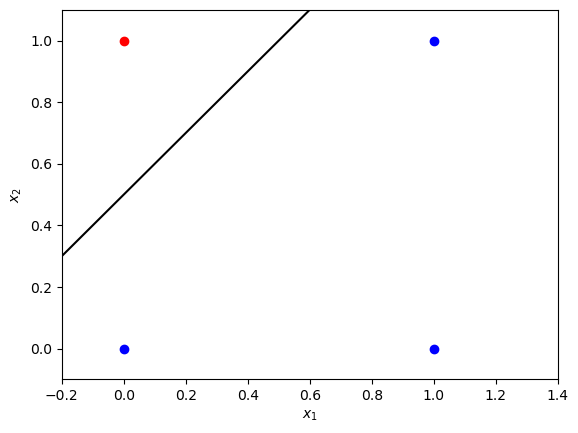

In [2]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
x_line = np.arange(xmin, xmax, 0.1)
# Data points (observations) from two classes.
ax.scatter(0, 0, color="b")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="b")
ax.scatter(1, 1, color="b")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
# One of the lines which can be used as a decision boundary to separate two classes.
ax.plot(x_line, x_line + 0.5, color="black")
plt.plot()
plt.show()

In [11]:
m = 30
X = np.random.randint(0,2,(2,m))
Y = np.logical_and(X[0] == 0, X[1] == 1).astype(int).reshape((1,m))

print('Training dataset X containing (x1, x2) coordinates in the columns:')
print(X)
print('Training dataset Y containing labels of two classes (0: blue, 1: red)')
print(Y)

print ('The shape of X is: ' + str(X.shape))
print ('The shape of Y is: ' + str(Y.shape))
print ('I have m = %d training examples!' % (X.shape[1]))

Training dataset X containing (x1, x2) coordinates in the columns:
[[1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0]
 [0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0]]
Training dataset Y containing labels of two classes (0: blue, 1: red)
[[0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0]]
The shape of X is: (2, 30)
The shape of Y is: (1, 30)
I have m = 30 training examples!


In [12]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

print("sigmoid(-2) = " + str(sigmoid(-2)))
print("sigmoid(0) = " + str(sigmoid(0)))
print("sigmoid(3.5) = " + str(sigmoid(3.5)))

sigmoid(-2) = 0.11920292202211755
sigmoid(0) = 0.5
sigmoid(3.5) = 0.9706877692486436


In [13]:
print(sigmoid(np.array([-2, 0, 3.5])))

[0.11920292 0.5        0.97068777]


In [14]:
X.shape

(2, 30)

In [15]:
def layer_sizes(X,Y):

    n_x = X.shape[0]
    n_y = Y.shape[0]

    return(n_x,n_y)

n_x,n_y = layer_sizes(X,Y)
print("The size of input layer is: n_x = " +str(n_x))
print("The size of output layer is: n_y = " +str(n_y))

The size of input layer is: n_x = 2
The size of output layer is: n_y = 1


In [16]:
def initialize_parameters(n_x,n_y):
    W = np.random.randn(n_y,n_x) * 0.01
    b = np.zeros((n_y,1))

    parameters = {"W":W,
                  "b":b}
    
    return parameters

parameters = initialize_parameters(n_x,n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[-0.00753335 -0.0174411 ]]
b = [[0.]]


In [17]:
def forward_propagation(X,parameters):

    W = parameters["W"]
    b = parameters["b"]

    Z = np.matmul(W,X)+b
    A = sigmoid(Z)

    return A

A = forward_propagation(X,parameters)

print(A)

[[0.49811667 0.49563983 0.49375671 0.49375671 0.49811667 0.49375671
  0.49811667 0.49563983 0.49811667 0.49563983 0.49375671 0.49811667
  0.49375671 0.49375671 0.5        0.49563983 0.49563983 0.49811667
  0.5        0.49811667 0.49563983 0.49563983 0.49375671 0.5
  0.49375671 0.5        0.5        0.5        0.49375671 0.5       ]]


In [18]:
def compute_cost(A,Y):

    m = Y.shape[1]

    logprobs = -np.multiply(np.log(A),Y) - np.multiply(np.log(1-A),1-Y)
    cost = 1/m * np.sum(logprobs)

    return cost

print("cost = " + str (compute_cost(A,Y)))

cost = 0.6905908341038066


In [ ]:
def backward_propagation(A,X,Y):


    m = X.shape[1]

    dZ = A-Y
    dW = 1/m * np.dot(dZ,X.T)
    db = 1/m * np.sum(dZ, axis=1, keepdims= True)
    